# Helper Notebook Lecture 17
I used this notebook to generate figures

# **Not to be shared with the students**

In [83]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import ensemble
sns.set(style="ticks")
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib 
import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)


from matplotlib.colors import ListedColormap
sns.set_context('poster')

# Gradient boosting plots

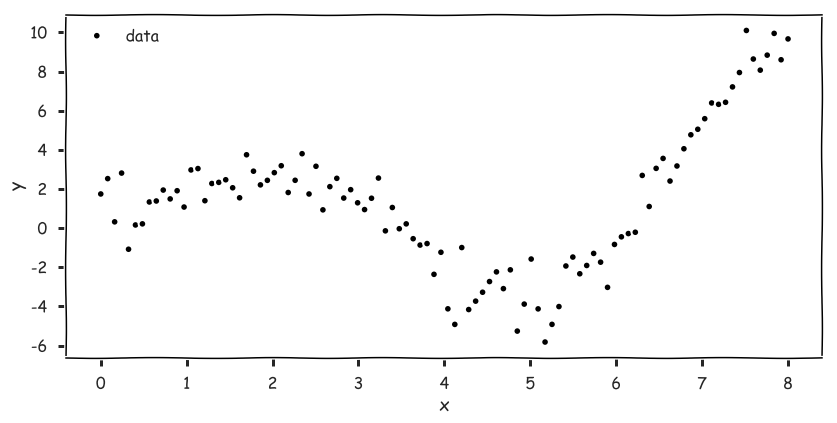

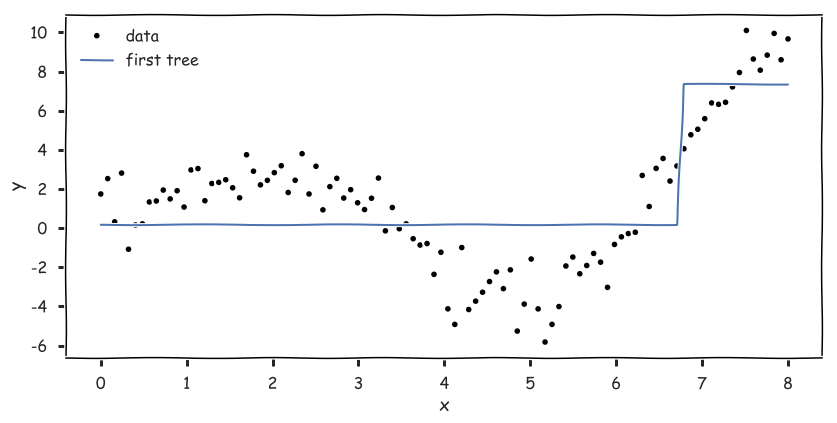

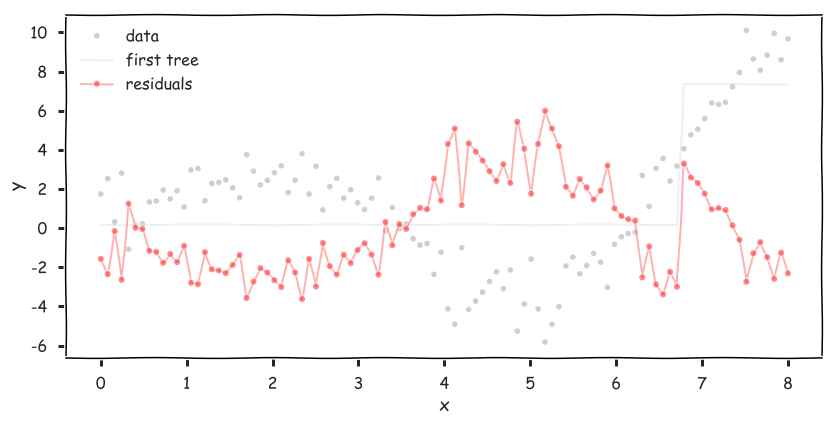

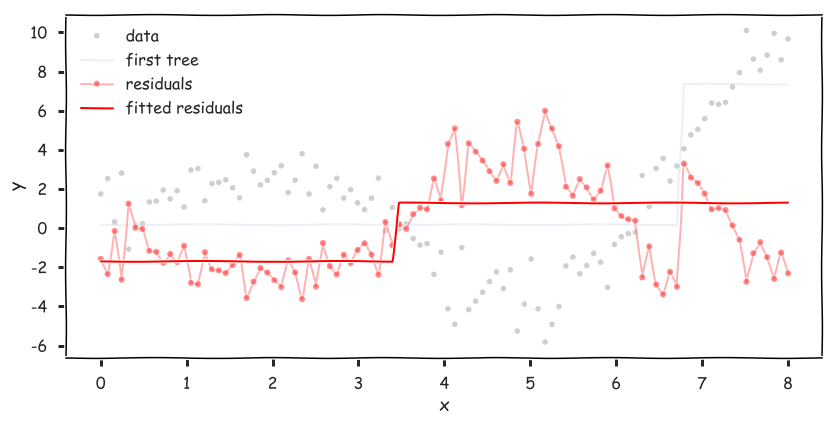

In [114]:
# start with x*sin(x) 

npt=100
np.random.seed(94)
x = np.linspace(0,8, npt)
x = x.reshape(-1,1)
y = x * np.sin(x) + np.random.normal(loc=0, scale=1, size=(npt,1)) +1

plt.xkcd(scale=0.4, length=0.0)

fig =plt.figure(figsize=(15, 7))
fig.patch.set_alpha(0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.2, right=None)

eta = .5 

plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,y, '.', color='k', label='data')
plt.legend()


plt.savefig('../fig/GB1.png', dpi=300,bbox_inches=0, transparent=True)
plt.show()


##### .
fig =plt.figure(figsize=(15, 7))
fig.patch.set_alpha(0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.2, right=None)


clf = DecisionTreeRegressor(max_depth=1)
clf.fit(x,y)

y_pred = clf.predict(x)


plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,y, '.', color='k', label='data')
plt.plot(x,y_pred, '-', label='first tree')
plt.legend()

plt.savefig('../fig/GB2.png', dpi=300,bbox_inches=0, transparent=True)
plt.show()

#########
fig =plt.figure(figsize=(15, 7))
fig.patch.set_alpha(0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.2, right=None)


# calculate the residuals 
res = y_pred.reshape(-1,1) -y 



clf.fit(x, res)

r_pred = clf.predict(x)

plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,y, '.', color='k', label='data', alpha=0.1)
plt.plot(x,y_pred, '-', label='first tree' ,alpha=0.1)
plt.plot(x, res, 'r-o', ms=6,  label='residuals' ,alpha=0.3)

plt.legend()
#plt.plot(x, r_pred)
plt.savefig('../fig/GB3.png', dpi=300,bbox_inches=0, transparent=True)
plt.show()

###### 

fig =plt.figure(figsize=(15, 7))
fig.patch.set_alpha(0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.2, right=None)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,y, '.', color='k', label='data', alpha=0.1)
plt.plot(x,y_pred, '-', label='first tree' ,alpha=0.1)
plt.plot(x, res, 'r-o', ms=6,  label='residuals' ,alpha=0.3)


plt.plot(x, r_pred, 'r',  label='fitted residuals')
plt.legend()
plt.savefig('../fig/GB4.png', dpi=300,bbox_inches=0, transparent=True)
plt.show()


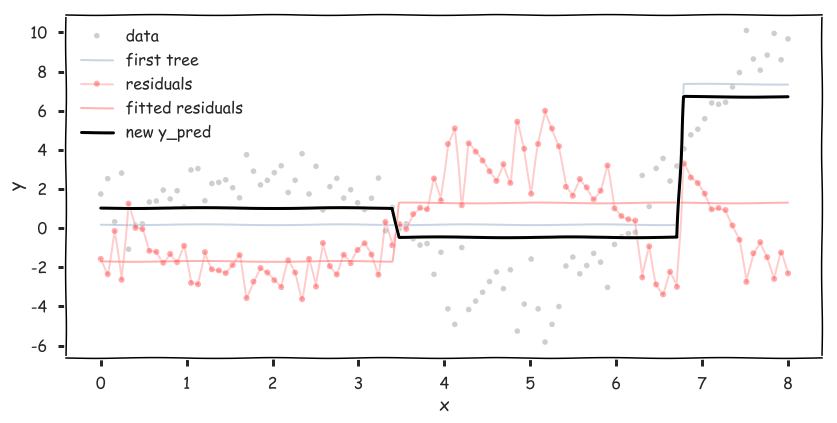

In [115]:
fig =plt.figure(figsize=(15, 7))
fig.patch.set_alpha(0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.2, right=None)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,y, '.', color='k', label='data', alpha=0.1)
plt.plot(x,y_pred, '-', label='first tree' ,alpha=0.3)
plt.plot(x, res, 'r-o', ms=6,  label='residuals' ,alpha=0.2)


plt.plot(x, r_pred, 'r',  label='fitted residuals' ,alpha=0.3)
y_new =  y_pred - eta*r_pred
plt.plot(x, y_new,  'k', lw=3, label='new y_pred ')
plt.legend()

plt.savefig('../fig/GB5.png', dpi=300,bbox_inches=0, transparent=True)
plt.show()



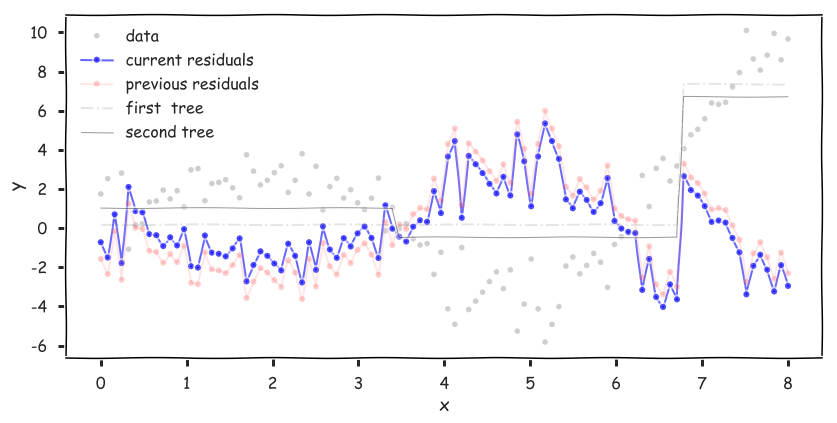

In [130]:
##### recalculate the residuals 



fig =plt.figure(figsize=(15, 7))
fig.patch.set_alpha(0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.2, right=None)
plt.xlabel('x')
plt.ylabel('y')

res_new = y_new.reshape(-1,1) - y 

plt.plot(x,y, '.', color='k', label='data', alpha=0.1)
#plt.plot(x,y_pred, '-', label='first tree' ,alpha=0.3)
plt.plot(x, res_new, 'b-o', ms=6,  label='current residuals' ,alpha=0.6)

plt.plot(x, res, 'r-o', ms=6,  label='previous residuals' ,alpha=0.1)


plt.plot(x, y_pred, 'k-.',  label='first  tree' ,alpha=0.1)

plt.plot(x, y_new,  'k', lw=1, label='second tree ', alpha=0.4)
plt.legend()

plt.savefig('../fig/GB6.png', dpi=300,bbox_inches=0, transparent=True)


In [91]:
y_new.shape

(100,)

## Plots for adaboost 

In [8]:
#read data credit 

df = pd.read_csv("../data/lendingtree.csv")
df.head()

,Income,Credit,Repay
0,85,620,1
1,108,648,1
2,60,682,1
3,110,701,1
4,69,731,1


In [84]:
def overlay_decision_boundary(ax, model, colors=None, nx=200, ny=200, desaturate=.5):
    """
    A function that visualizes the decision boundaries of a classifier.
    
    ax: Matplotlib Axes to plot on
    model: Classifier (has a `.predict` method)
    X: feature vectors
    y: ground-truth classes
    colors: list of colors to use. Use color colors[i] for class i.
    nx, ny: number of mesh points to evaluated the classifier on
    desaturate: how much to desaturate each of the colors (for better contrast with the sample points)
    """
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    # Create mesh
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xmin, xmax, nx),
        np.linspace(ymin, ymax, ny))
    X = np.c_[xx.flatten(), yy.flatten()]

    # Predict on mesh of points
    model = getattr(model, 'predict', model)
    y = model(X)
    y = y.reshape((nx, ny))

    # Generate colormap.
    if colors is None:
        colors = sns.utils.get_color_cycle()
        y -= y.min() # If first class is not 0, shift.
    assert np.max(y) <= len(colors)
    colors = [sns.utils.desaturate(color, desaturate) for color in colors]
    cmap = matplotlib.colors.ListedColormap(colors)

    # Plot decision surface
    #ax.pcolormesh(xx, yy, y,antialiaseds=True, zorder=-2, cmap=cmap, norm=matplotlib.colors.NoNorm(), vmin=0, vmax=y.max() + 1, alpha=0.3)
    xx = xx.reshape(nx, ny)
    yy = yy.reshape(nx, ny)
    ax.contourf(xx, yy, y, zorder=-1, alpha=0.1, cmap= cmap_light)
    ax.contour(xx, yy, y, colors="black", linewidths=1, zorder=-1, alpha=0.3)

In [85]:
def scatter_stars(ax, df, columns, class_labels, class_colors, s=5, **kw):
    for idx, (color, name) in enumerate(zip(class_colors, class_labels)):
        subset = df[df['Repay'] == name]
        ax.scatter(
            subset[columns[0]], subset[columns[1]],
            label=name,
            c=color, s=s, **kw)
    ax.set(xlabel=columns[0], ylabel=columns[1])
    ax.legend()
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])


In [165]:
X_train = df.iloc[:, df.columns != 'Repay'].values
y_train = df['Repay'].values


In [87]:
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])

0
1


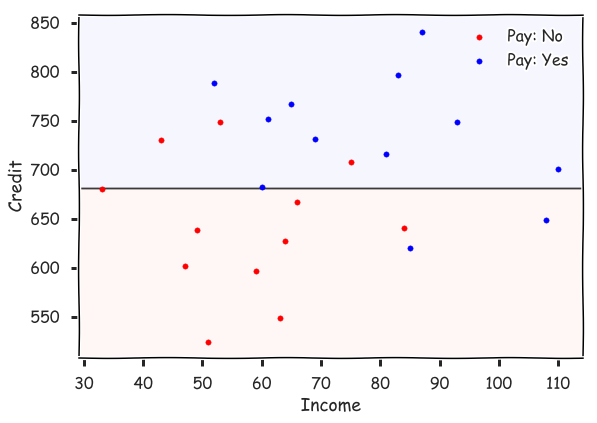

In [92]:

plt.xkcd(scale=0.4, length=0.0)
f, axes = plt.subplots(1,1, figsize = (10,7))

f.patch.set_alpha(0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.2, right=None)


d2 = DecisionTreeClassifier(max_depth=1)

d2.fit(X_train, y_train)

class_names = ['Pay: No', 'Pay: Yes']
class_labels = [0, 1]
class_colors=['r', 'b']
columns = ['Income', 'Credit']

for idx, (color, name, cname) in enumerate(zip(class_colors, class_labels, class_names)):
        print(name)
        subset = df[df['Repay'] == name]
        axes.scatter(subset[columns[0]], subset[columns[1]], label=cname, s=28, 
            c=color)
axes.set_xlabel(columns[0])
axes.set_ylabel(columns[1])
axes.legend()



overlay_decision_boundary(axes, d2, colors=class_colors, desaturate=.3)

plt.savefig('../fig/Ada2.png', dpi=300,bbox_inches=0, transparent=True)

0
1


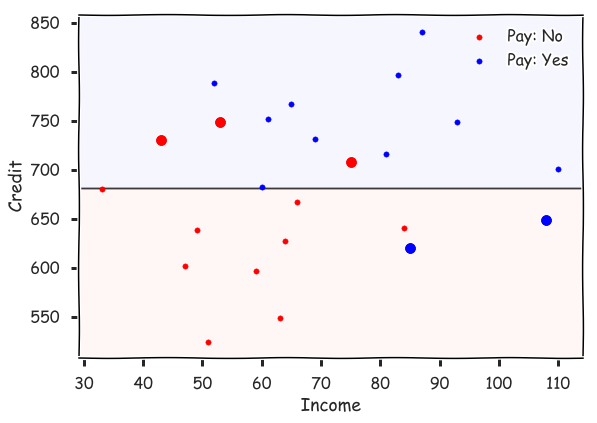

In [167]:

plt.xkcd(scale=0.4, length=0.0)
f, axes = plt.subplots(1,1, figsize = (10,7))

f.patch.set_alpha(0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.2, right=None)


d2 = DecisionTreeClassifier(max_depth=1)

d2.fit(X_train, y_train)

class_names = ['Pay: No', 'Pay: Yes']
class_labels = [0, 1]
class_colors=['r', 'b']
columns = ['Income', 'Credit']

for idx, (color, name, cname) in enumerate(zip(class_colors, class_labels, class_names)):
        print(name)
        subset = df[df['Repay'] == name]
        axes.scatter(subset[columns[0]], subset[columns[1]], label=cname, s=28, 
            c=color)
axes.set_xlabel(columns[0])
axes.set_ylabel(columns[1])
axes.legend()


for idx, (color, name, cname) in enumerate(zip(class_colors, class_labels, class_names)):
        q1 = df[(df['Repay'] == 1) & (df.Credit < 675)]
        plt.scatter(q1.Income, q1.Credit, color='b', s=99)
        q2 = df[(df['Repay'] == 0) & (df.Credit > 689)]
        plt.scatter(q2.Income, q2.Credit, color='r', s=99)

overlay_decision_boundary(axes, d2, colors=class_colors, desaturate=.3)

plt.savefig('../fig/Ada3.png', dpi=300,bbox_inches=0, transparent=True)

0
1


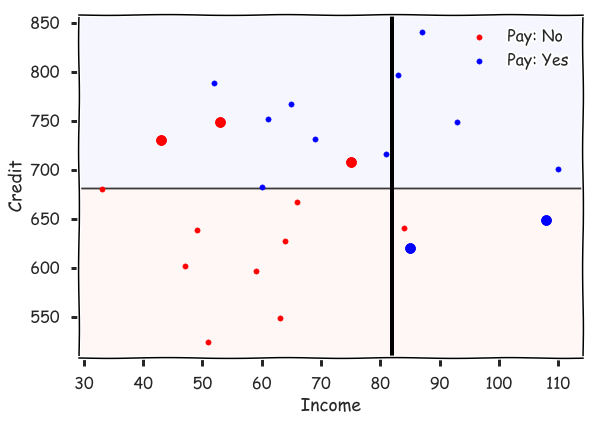

In [168]:
q3 = np.vstack((q1,q2))

d2.fit(q3[:,:2], q3[:, 2])


plt.xkcd(scale=0.4, length=0.0)
f, axes = plt.subplots(1,1, figsize = (10,7))

f.patch.set_alpha(0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.2, right=None)


d2 = DecisionTreeClassifier(max_depth=1)

d2.fit(X_train, y_train)

class_names = ['Pay: No', 'Pay: Yes']
class_labels = [0, 1]
class_colors=['r', 'b']
columns = ['Income', 'Credit']

for idx, (color, name, cname) in enumerate(zip(class_colors, class_labels, class_names)):
        print(name)
        subset = df[df['Repay'] == name]
        axes.scatter(subset[columns[0]], subset[columns[1]], label=cname, s=28, 
            c=color)
axes.set_xlabel(columns[0])
axes.set_ylabel(columns[1])
axes.legend()


for idx, (color, name, cname) in enumerate(zip(class_colors, class_labels, class_names)):
        q1 = df[(df['Repay'] == 1) & (df.Credit < 675)]
        plt.scatter(q1.Income, q1.Credit, color='b', s=99)
        q2 = df[(df['Repay'] == 0) & (df.Credit > 689)]
        plt.scatter(q2.Income, q2.Credit, color='r', s=99)

overlay_decision_boundary(axes, d2, colors=class_colors, desaturate=.3)
plt.vlines(82, ymin=510, ymax=857, lw=4)
plt.savefig('../fig/Ada4.png', dpi=300,bbox_inches=0, transparent=True)

0
1


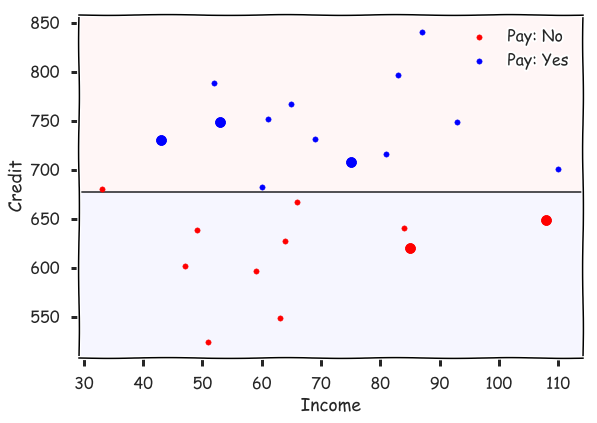

In [169]:
q3 = np.vstack((q1,q2))

d2.fit(q3[:,:2], q3[:, 2])


plt.xkcd(scale=0.4, length=0.0)
f, axes = plt.subplots(1,1, figsize = (10,7))

f.patch.set_alpha(0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.2, right=None)



class_names = ['Pay: No', 'Pay: Yes']
class_labels = [0, 1]
class_colors=['r', 'b']
columns = ['Income', 'Credit']

for idx, (color, name, cname) in enumerate(zip(class_colors, class_labels, class_names)):
        print(name)
        subset = df[df['Repay'] == name]
        axes.scatter(subset[columns[0]], subset[columns[1]], label=cname, s=28, 
            c=color)
axes.set_xlabel(columns[0])
axes.set_ylabel(columns[1])
axes.legend()


for idx, (color, name, cname) in enumerate(zip(class_colors, class_labels, class_names)):
        q1 = df[(df['Repay'] == 1) & (df.Credit < 675)]
        plt.scatter(q1.Income, q1.Credit, color='r', s=99)
        q2 = df[(df['Repay'] == 0) & (df.Credit > 689)]
        plt.scatter(q2.Income, q2.Credit, color='b', s=99)

overlay_decision_boundary(axes, d2, colors=class_colors, desaturate=.3)

plt.savefig('../fig/Ada5.png', dpi=300,bbox_inches=0, transparent=True)

0
1


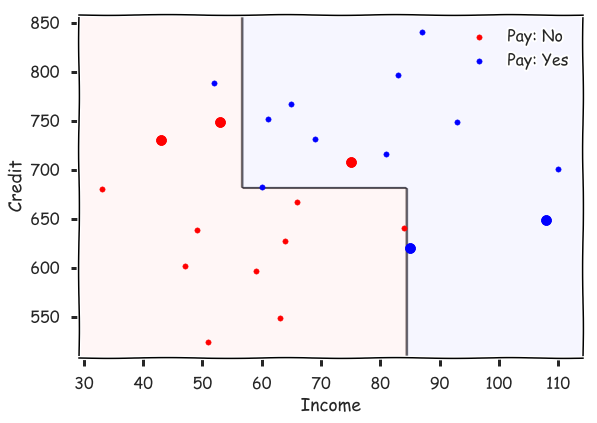

In [172]:

d2 = DecisionTreeClassifier(max_depth=2)

d2.fit(X_train, y_train)


plt.xkcd(scale=0.4, length=0.0)
f, axes = plt.subplots(1,1, figsize = (10,7))

f.patch.set_alpha(0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.2, right=None)



class_names = ['Pay: No', 'Pay: Yes']
class_labels = [0, 1]
class_colors=['r', 'b']
columns = ['Income', 'Credit']

for idx, (color, name, cname) in enumerate(zip(class_colors, class_labels, class_names)):
        print(name)
        subset = df[df['Repay'] == name]
        axes.scatter(subset[columns[0]], subset[columns[1]], label=cname, s=28, 
            c=color)
axes.set_xlabel(columns[0])
axes.set_ylabel(columns[1])
axes.legend()


for idx, (color, name, cname) in enumerate(zip(class_colors, class_labels, class_names)):
        q1 = df[(df['Repay'] == 1) & (df.Credit < 675)]
        plt.scatter(q1.Income, q1.Credit, color='b', s=99)
        q2 = df[(df['Repay'] == 0) & (df.Credit > 689)]
        plt.scatter(q2.Income, q2.Credit, color='r', s=99)

overlay_decision_boundary(axes, d2, colors=class_colors, desaturate=.3)

plt.savefig('../fig/Ada6.png', dpi=300,bbox_inches=0, transparent=True)